# Data Cleaning and Analysis

### Part 1: A Transforming Industry
The hotel booking landscape has undergone a dramatic shift, with most reservations now handled through third-party platforms like [Booking.com](https://www.hotelmanagement.net/tech/study-cancelation-rate-at-40-as-otas-push-free-change-policy). Online Travel Agencies (OTAs) have elevated cancellation policies to a central feature in their marketing strategies ([source](https://triptease.com/blog/the-real-cost-of-free-cancellations/)). Customers have grown accustomed to flexible cancellation terms, pushing cancellation rates to nearly 40% in 2018—a 6% increase since 2014 ([source](https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/)). While appealing for travelers, this trend complicates forecasting for hotels, reducing occupancy efficiency and impacting revenue ([source](https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/)).

---

### Part 2: The Financial and Operational Strain of Cancellations
To mitigate risks, some hotels utilize services like [Booking.com's "Risk Free Reservations"](https://triptease.com/blog/the-real-cost-of-free-cancellations/), which transfer financial responsibility to OTAs if a canceled booking cannot be replaced. Regardless of who bears the cost, cancellations impose a financial burden across the industry. Beyond revenue losses, cancellations disrupt operations, leading to staffing inefficiencies and potentially negative guest experiences. 

In today’s review-driven economy, where [TripAdvisor influenced $546 billion](https://www.stayntouch.com/blog/how-online-reviews-impact-hotel-revenue/) in travel spending in 2017, maintaining strong online reviews is critical. An increase in reputation scores can directly translate into higher occupancy and revenue ([source](https://vtechworks.lib.vt.edu/handle/10919/85353)). Accurate predictions of which bookings might be canceled are therefore invaluable for hotel operations.

---

### Part 3: Patterns Behind Cancellations
Certain booking characteristics provide clues about cancellation likelihood. For instance, canceled bookings typically have stays that are 65% longer and a lead time of around 60 days ([source](https://www.d-edge.com/how-online-hotel-distribution-is-changing-in-europe/)). Understanding these patterns and the reasons behind cancellations is essential for minimizing their impact. Hotels that proactively analyze booking trends can tailor strategies to reduce the risk of cancellations.

---

### Part 4: Leveraging Data to Improve Efficiency
Data holds the key to addressing the challenges posed by cancellations. With the right tools, hotels can segment their customer base, identify high-risk bookings, and optimize their operations. Predictive models can offer actionable insights, helping hotels prioritize resources effectively and enhance revenue by minimizing the financial impact of cancellations.

---

### Part 5: Insights from Real Booking Data
The insights presented here are supported by the [Hotel Booking Demand Dataset](https://www.sciencedirect.com/science/article/pii/S2352340918315191), which captures booking data for two hotels in Portugal—a resort in the Algarve and a city hotel in Lisbon. Spanning July 2015 to August 2017, the dataset includes 119,390 records across 31 variables. This comprehensive resource provides valuable perspectives on booking trends, cancellations, and customer behaviors. For more details on the dataset structure, visit the [data dictionary](#Data-Dictionary). 

---

### Part 6: Shaping the Future with Data
Harnessing data analytics allows hotels to navigate the complexities of modern booking behaviors. By identifying patterns, reducing cancellations, and improving operations, hotels can foster guest satisfaction and achieve sustainable growth in an increasingly competitive market.

---


Data from the [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191). The dataset provides data from real bookings scheduled to arrive between July, 1st 2015 and August, 31st 2017 from two hotels in Portugal (a resort in the Algarve region and a hotel in the city of Lisbon). Booking data from both hotels share the same structure, with 31 variables describing the 119.390 observations. For a detailed list and description of those variables refer to the [data dictionary](#Data-Dictionary).   

The dataframe is cleaned during this notebook, making sure to address any null values, reformat certain features, and engineer new ones.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import re
import pickle


from kmodes.kprototypes import KPrototypes

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap

In [63]:
pd.set_option('display.max_columns', None)

### Hotel Data Imports

Data gathered from the [Hotel Booking Demand Datasets](https://www.sciencedirect.com/science/article/pii/S2352340918315191). 
2 Hotels bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled.

In [64]:
data = pd.read_csv('hotel_bookings.csv')

In [65]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [66]:
data.shape

(119390, 32)

- **adr** (Numeric): Average Daily Rate. Calculated by dividing lodging transactions by the total number of staying nights. Source: BO, BL, and TR.
- **adults** (Integer): Number of adults in the booking. Source: BO and BL.
- **agent** (Categorical): ID of the travel agency that made the booking. Source: BO and BL.
- **arrival_date_day_month** (Integer): Day of the month of the arrival date. Source: BO and BL.
- **arrival_date_month** (Categorical): Month of arrival date (January to December). Source: BO and BL.
- **arrival_date_year** (Integer): Year of arrival date. Source: BO and BL.
- **arrival_date_week_number** (Integer): Week number of the arrival date (1-53). Source: BO and BL.
- **assigned_room_type** (Categorical): Code of the room type assigned to the booking. Source: BO and BL.
- **babies** (Integer): Number of babies included in the booking. Source: BO and BL.
- **booking_changes** (Integer): Number of changes/amendments made to the booking. Calculated by tracking changes to booking attributes. Source: BO and BL.
- **children** (Integer): Number of children included in the booking. Sum of payable and non-payable children. Source: BO and BL.
- **company** (Categorical): ID of the company/entity responsible for the booking. Source: BO and BL.
- **country** (Categorical): Country of origin (ISO 3166-1 format). Source: BO, BL, and NT.
- **customer_type** (Categorical): Type of customer for the booking (e.g., Contract, Group, Transient, Transient-Party). Source: BO and BL.
- **days_in_waiting_list** (Integer): Number of days the booking was on the waiting list. Calculated by subtracting the confirmation date from the booking date. Source: BO.
- **deposit_type** (Categorical): Indicates if a deposit was made and its type (No Deposit, Refundable, Non Refund). Source: BO and TR.
- **distribution_channel** (Categorical): Booking distribution channel (e.g., TA = Travel Agents, TO = Tour Operators). Source: BO, BL, and DC.
- **is_canceled** (Categorical): Indicates if the booking was canceled (1 = Yes, 0 = No). Source: BO.
- **is_repeated_guest** (Categorical): Indicates if the guest is a repeated customer (1 = Yes, 0 = No). Source: BO, BL, and C.
- **lead_time** (Integer): Days between booking entry and arrival date. Calculated by subtracting entry date from arrival date. Source: BO and BL.
- **market_segment** (Categorical): Market segment designation (e.g., Direct, Corporate, Online TA). Source: BO, BL, and MS.
- **meal** (Categorical): Type of meal booked (e.g., SC = Undefined, BB = Bed & Breakfast, HB = Half Board, FB = Full Board). Source: BO, BL, and ML.
- **previous_bookings_not_canceled** (Integer): Number of previous bookings not canceled by the customer. If no customer profile exists, this value is set to 0. Source: BO and BL.
- **previous_cancellations** (Integer): Number of previous bookings canceled by the customer. If no customer profile exists, this value is set to 0. Source: BO and BL.
- **required_car_parking_spaces** (Integer): Number of car parking spaces required. Source: BO and BL.
- **reservation_status** (Categorical): Final status of the reservation (Canceled, Check-Out, No-Show). Source: BO.
- **reservation_status_date** (Date): Date of the last reservation status change. Source: BO.
- **reserved_room_type** (Categorical): Code of the room type reserved. Source: BO and BL.
- **stays_in_weekend_nights** (Integer): Number of weekend nights (Saturday or Sunday) stayed or booked. Source: BO and BL.
- **stays_in_week_nights** (Integer): Number of weeknights (Monday to Friday) stayed or booked. Source: BO and BL.
- **total_of_special_requests** (Integer): Total number of special requests made by the customer. Source: BO and BL.

In [67]:
# Checking nulls
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- children contains 4 nulls
- country contains 488 nulls
- agent contains 16340 nulls that in this case means no agent was used
- company contains 112593 nulls that in this case means no company was used

Then, we will fill the nulls with the following values:
- children, remove the 4 rows
- country, remove the 488 rows (0.4% of the data) because it is an error in the data due to the fact that the country is a mandatory field and it is a small percentage of the data.
- agent, fill with "no_agent"
- company, fill with "no_company"

In [68]:
# Dropping rows with missing values and filling the rest with the corresponding data
data = data.dropna(subset=['children'])
data = data.dropna(subset=['country'])
data['agent'] = data['agent'].fillna('no_agent')
data['company'] = data['company'].fillna('no_company')

<Axes: >

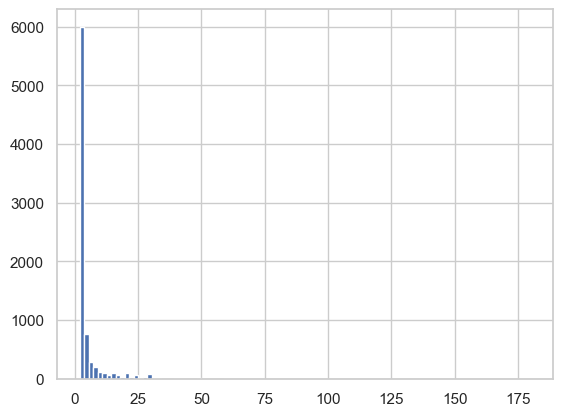

In [69]:
# Duplicates
row_counts = data.value_counts()

duplicates_only = row_counts[row_counts > 1]

# show histogram
duplicates_only.hist(stacked=True, bins=100)

In [70]:
# how many are duplicated 1 time, 2 times, 3 times, etc.
duplicates_only.value_counts()

count
2      5030
3       967
4       496
5       274
6       171
       ... 
89        1
100       1
101       1
109       1
38        1
Name: count, Length: 72, dtype: int64

In [71]:
# Count occurrences of each row
row_counts = data.value_counts()

# Identify rows that appear more than 5 times
over_repeated_rows = row_counts[row_counts > 5].index

# Remove duplicates keeping one instance of rows that appear more than 5 times
data = (
    pd.concat([
        data[data.apply(tuple, axis=1).isin(row_counts[row_counts <= 5].index)],  # Keep rows <= 5 times
        data[data.apply(tuple, axis=1).isin(over_repeated_rows)].drop_duplicates()  # Keep one instance of > 5 times
    ])
    .reset_index(drop=True)
)

In [72]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [73]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])
data['children'] = data['children'].astype(int)
data['agent'] = data['agent'].astype(str)
data['company'] = data['company'].astype(str)

In [74]:
# Statistical summary for numerical columns and list and number of unique values for categorical columns
numerical_summary = data.describe()

# Unique values and counts for categorical columns
categorical_summary = {
    col: {'Unique Values': data[col].unique().tolist(), 'Count': data[col].nunique()}
    for col in data.select_dtypes(include=['object', 'category']).columns
}

# Display results
print("Statistical Summary for Numerical Columns:")
print(numerical_summary)

print("\nUnique Values and Counts for Categorical Columns:")
for col, summary in categorical_summary.items():
    print(f"{col}: {summary}")

Statistical Summary for Numerical Columns:
        is_canceled     lead_time  arrival_date_year  \
count  96488.000000  96488.000000       96488.000000   
mean       0.284139     83.624699        2016.204398   
min        0.000000      0.000000        2015.000000   
25%        0.000000     13.000000        2016.000000   
50%        0.000000     53.000000        2016.000000   
75%        1.000000    131.000000        2017.000000   
max        1.000000    737.000000        2017.000000   
std        0.451006     88.679769           0.689695   

       arrival_date_week_number  arrival_date_day_of_month  \
count              96488.000000               96488.000000   
mean                  26.959000                  15.847795   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   38.000000                  24.000000   
max               

1. **`lead_time`**:
   - **Issue**: Maximum value of 737 days (over two years) seems unusually high.
   - **Action**: Keep all.

2. **`stays_in_weekend_nights`** and **`stays_in_week_nights`**:
   - **Issue**: Maximum values of 16 weekend nights and 41 weeknights suggest unusually long stays.
   - **Action**: Remove more than 20 week nights and when the sum of both are equal to 0.

3. **`adults`**:
   - **Issue**: Maximum value of 55 adults per booking is excessively high and likely a data error. Group or incorrect.
   - **Action**: Remove more than 10 adults. And when the sum of adults, children and babies are equal to 0.

4. **`children`** and **`babies`**:
   - **Issue**: Maximum values of 10 children and 10 babies per booking seem unrealistic.
   - **Action**: Remove less than 0 children or babies. And when the sum of adults, children and babies are equal to 0.

5. **`adr` (Average Daily Rate)**:
   - **Issue**: Negative minimum value of -6.38 is likely invalid. Maximum value of 5400 is unusually high.
   - **Action**: Remove negative or 0 values and higher than 1000.

6. **`days_in_waiting_list`**:
   - **Issue**: Maximum value of 391 days on the waiting list is unusually long.

7. **`required_car_parking_spaces`**:
   - **Issue**: Maximum value of 8 spaces per booking is excessively high.
   - **Action**: Keep all.

---

### Categorical Columns
1. **`meal`**:
   - **Issue**: Presence of an "Undefined" category likely represents missing data.
   - **Action**: Replace "Undefined" with "No Meal".

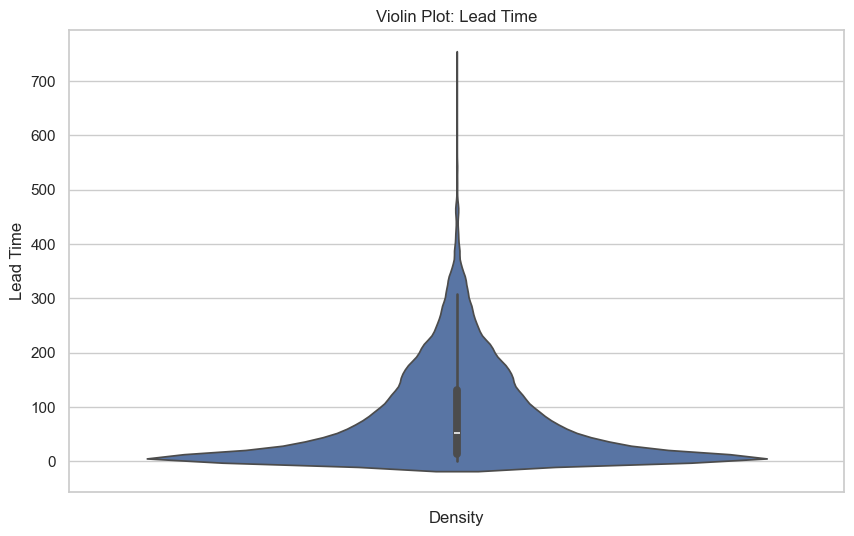

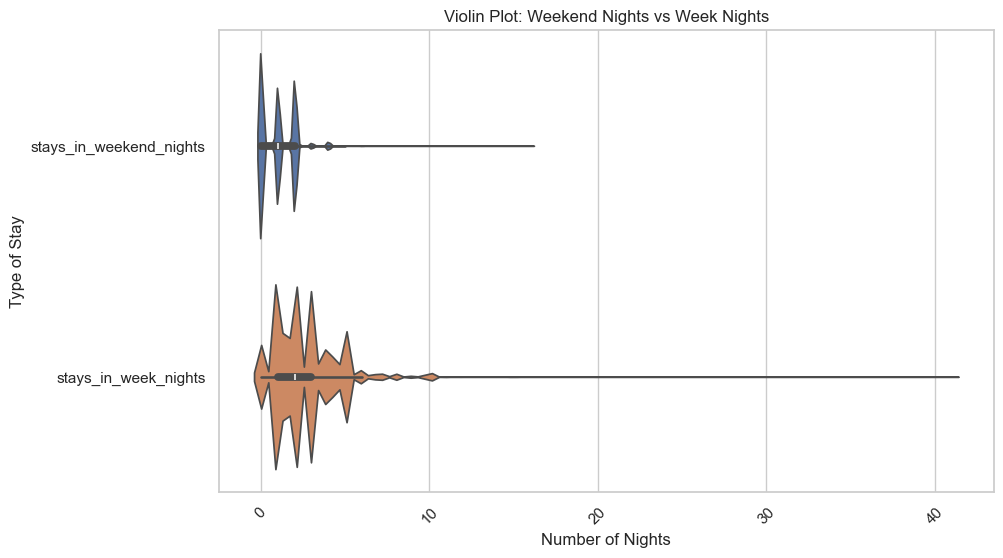

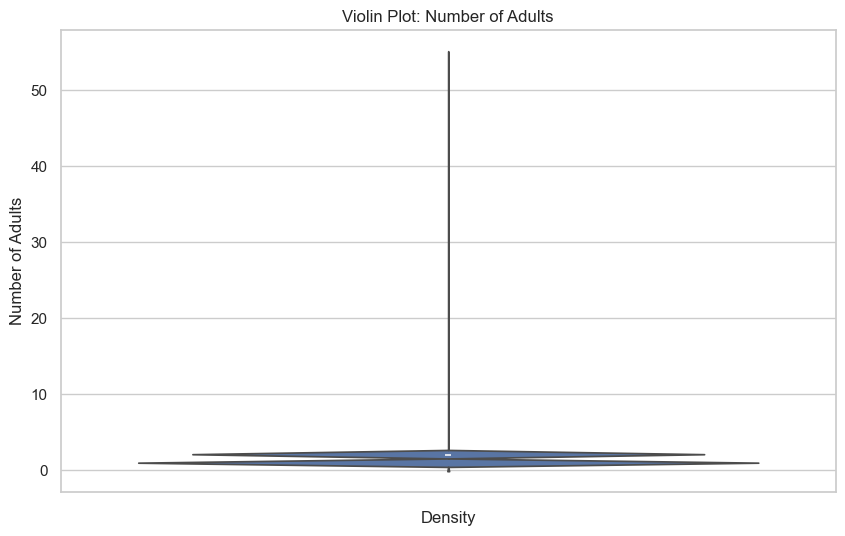

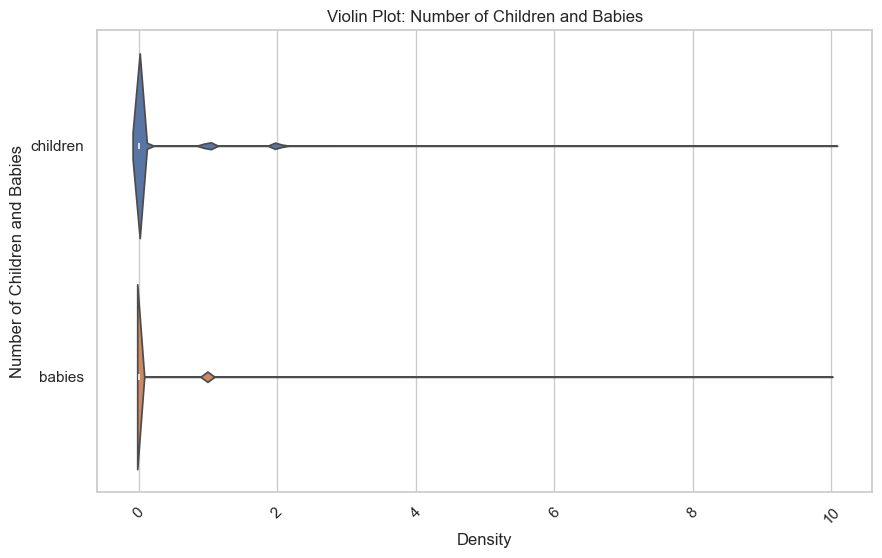

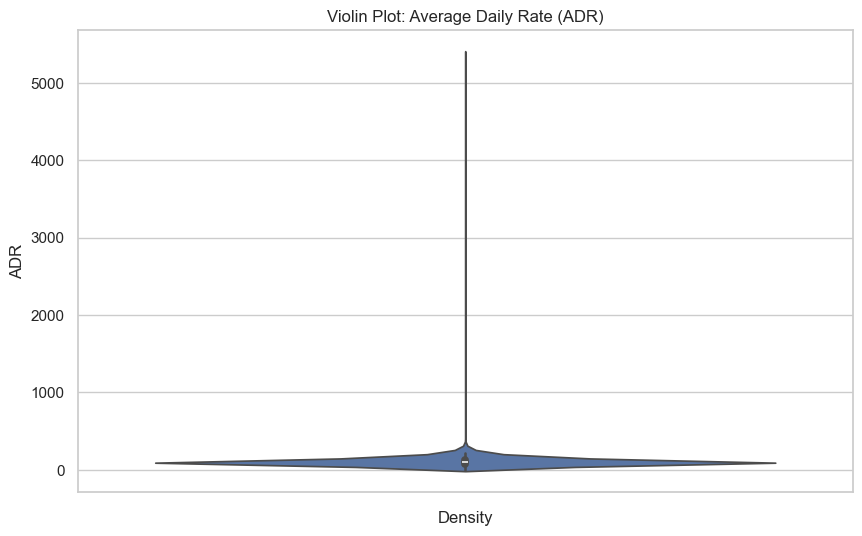

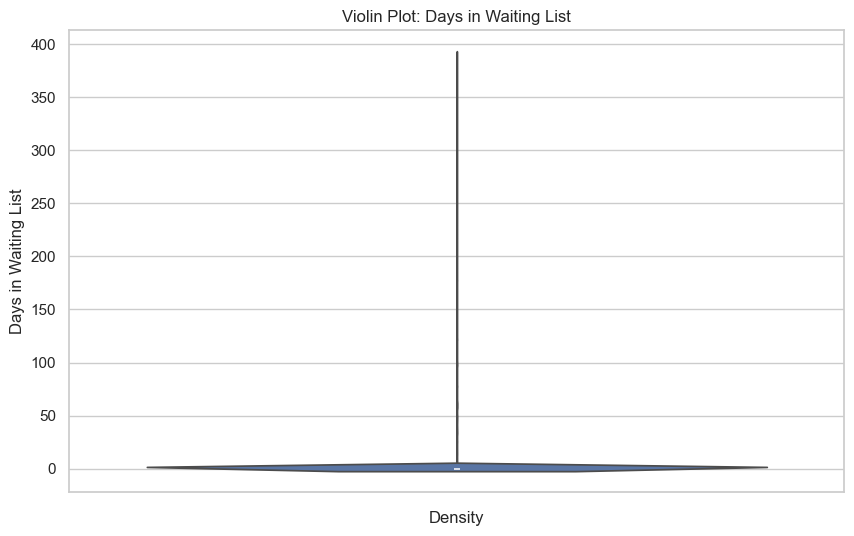

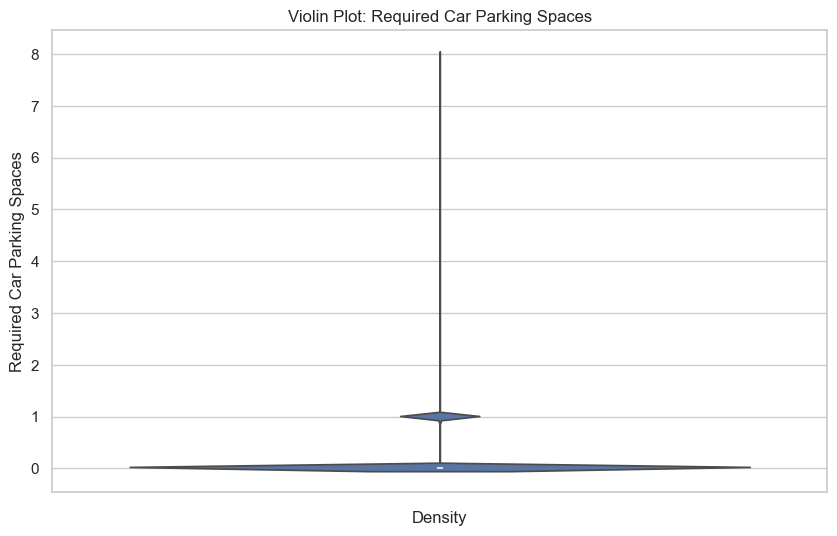

In [75]:
# Set the style for the plots
sns.set(style="whitegrid")

# 1. Violin plot for 'lead_time'
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y='lead_time')
plt.title('Violin Plot: Lead Time')
plt.xlabel('Density')
plt.ylabel('Lead Time')
plt.show()

# 2. Violin plots for 'stays_in_weekend_nights' and 'stays_in_week_nights'
plt.figure(figsize=(10, 6))
sns.violinplot(data=data[['stays_in_weekend_nights', 'stays_in_week_nights']], orient='h')
plt.title('Violin Plot: Weekend Nights vs Week Nights')
plt.xlabel('Number of Nights')
plt.ylabel('Type of Stay')
plt.xticks(rotation=45)
plt.show()

# 3. Violin plot for 'adults'
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y='adults')
plt.title('Violin Plot: Number of Adults')
plt.xlabel('Density')
plt.ylabel('Number of Adults')
plt.show()

# 4. Violin plots for 'children' and 'babies'
plt.figure(figsize=(10, 6))
sns.violinplot(data=data[['children', 'babies']], orient='h')
plt.title('Violin Plot: Number of Children and Babies')
plt.xlabel('Density')
plt.ylabel('Number of Children and Babies')
plt.xticks(rotation=45)
plt.show()

# 5. Violin plot for 'adr' (Average Daily Rate)
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y='adr')
plt.title('Violin Plot: Average Daily Rate (ADR)')
plt.xlabel('Density')
plt.ylabel('ADR')
plt.show()

# 6. Violin plot for 'days_in_waiting_list'
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y='days_in_waiting_list')
plt.title('Violin Plot: Days in Waiting List')
plt.xlabel('Density')
plt.ylabel('Days in Waiting List')
plt.show()

# 7. Violin plot for 'required_car_parking_spaces'
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, y='required_car_parking_spaces')
plt.title('Violin Plot: Required Car Parking Spaces')
plt.xlabel('Density')
plt.ylabel('Required Car Parking Spaces')
plt.show()

In [76]:
data = data[
    ~(
        (data['stays_in_week_nights'] > 20) |  # Remove if week nights > 20
        ((data['stays_in_weekend_nights'] + data['stays_in_week_nights']) == 0)  # Remove if both sum to 0
    )
]

data = data[
    ~(
        (data['adults'] > 10) |  # Remove if adults > 10
        (data['adults'] <= 0) | # Remove if adults <= 0
        ((data['adults'] + data['children'] + data['babies']) == 0)  # Remove if total of all is 0
    )
]

data = data[
    ~(
        (data['children'] < 0) |  # Remove if children < 0
        (data['babies'] < 0) |  # Remove if babies < 0
        ((data['adults'] + data['children'] + data['babies']) == 0)  # Remove if total of all is 0
    )
]

data = data[
    ~(
        (data['adr'] <= 0) |  # Remove if ADR is negative or 0
        (data['adr'] > 1000)  # Remove if ADR > 1000
    )
]
data['meal'] = data['meal'].replace(['Undefined'],'No Meal')

In [77]:
# Statistical summary for numerical columns and list and number of unique values for categorical columns
numerical_summary = data.describe()

# Unique values and counts for categorical columns
categorical_summary = {
    col: {'Unique Values': data[col].unique().tolist(), 'Count': data[col].nunique()}
    for col in data.select_dtypes(include=['object', 'category']).columns
}

# Display results
print("Statistical Summary for Numerical Columns:")
print(numerical_summary)

print("\nUnique Values and Counts for Categorical Columns:")
for col, summary in categorical_summary.items():
    print(f"{col}: {summary}")

Statistical Summary for Numerical Columns:
        is_canceled     lead_time  arrival_date_year  \
count  94308.000000  94308.000000       94308.000000   
mean       0.287431     84.388652        2016.209590   
min        0.000000      0.000000        2015.000000   
25%        0.000000     13.000000        2016.000000   
50%        0.000000     54.000000        2016.000000   
75%        1.000000    132.000000        2017.000000   
max        1.000000    709.000000        2017.000000   
std        0.452566     88.555136           0.688197   

       arrival_date_week_number  arrival_date_day_of_month  \
count              94308.000000               94308.000000   
mean                  26.927419                  15.852388   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  24.000000   
max               

In [78]:
# Map months to their numerical representation
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

# Combine year, month, and day into a single 'arrival_date' column
data['arrival_date'] = (
    data['arrival_date_year'].astype(str) + "-" +
    data['arrival_date_month'].map(month_map).astype(str) + "-" +
    data['arrival_date_day_of_month'].astype(str)
)

# Drop the original arrival date columns
data.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

# Convert 'arrival_date' to datetime
data['arrival_date'] = pd.to_datetime(data['arrival_date'], format="%Y-%m-%d")

# Ensure 'reservation_status_date' is in datetime format
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format="%Y-%m-%d")

# Calculate the difference in days for canceled bookings
# Only apply to rows where the booking was canceled
data['days_before_cancellation'] = (
    data['reservation_status_date'] - data['arrival_date']
).dt.days

# Keep 'days_before_cancellation' values only for canceled bookings
data['days_before_cancellation'] = data['days_before_cancellation'].where(data['is_canceled'] == 1)

# Display the updated DataFrame
print(data[['arrival_date', 'reservation_status_date', 'is_canceled', 'days_before_cancellation']].head())

  arrival_date reservation_status_date  is_canceled  days_before_cancellation
2   2015-07-01              2015-07-02            0                       NaN
3   2015-07-01              2015-07-02            0                       NaN
4   2015-07-01              2015-07-03            0                       NaN
5   2015-07-01              2015-07-03            0                       NaN
6   2015-07-01              2015-07-03            0                       NaN


In [79]:
# Separating Local and Foreign Guests
data['is_local'] = data['country'].apply(lambda x: 1 if x == 'PRT' else 0)

# Check the first few rows to verify
print(data[['country', 'is_local']].head())

  country  is_local
2     GBR         0
3     GBR         0
4     GBR         0
5     GBR         0
6     PRT         1


In [80]:
# reset index
data.reset_index(drop=True, inplace=True)

data.to_csv('hotel_bookings_cleaned.csv', index=False)

In [81]:
# Statistical summary for numerical columns and list and number of unique values for categorical columns
numerical_summary = data.describe()

# Unique values and counts for categorical columns
categorical_summary = {
    col: {'Unique Values': data[col].unique().tolist(), 'Count': data[col].nunique()}
    for col in data.select_dtypes(include=['object', 'category']).columns
}

# Display results
print("Statistical Summary for Numerical Columns:")
print(numerical_summary)

print("\nUnique Values and Counts for Categorical Columns:")
for col, summary in categorical_summary.items():
    print(f"{col}: {summary}")

Statistical Summary for Numerical Columns:
        is_canceled     lead_time  arrival_date_week_number  \
count  94308.000000  94308.000000              94308.000000   
mean       0.287431     84.388652                 26.927419   
min        0.000000      0.000000                  1.000000   
25%        0.000000     13.000000                 16.000000   
50%        0.000000     54.000000                 27.000000   
75%        1.000000    132.000000                 37.000000   
max        1.000000    709.000000                 53.000000   
std        0.452566     88.555136                 13.643559   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             94308.000000          94308.000000  94308.000000   
mean                  1.001527              2.621633      1.877359   
min                   0.000000              0.000000      1.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000         

- **adr** (Numeric): Average Daily Rate. Calculated by dividing lodging transactions by the total number of staying nights. Source: BO, BL, and TR.
- **adults** (Integer): Number of adults in the booking. Source: BO and BL.
- **agent** (Categorical): ID of the travel agency that made the booking. Source: BO and BL.
- **arrival_date** (Date): Arrival date. Source: BO and BL.
- **arrival_date_week_number** (Integer): Week number of the arrival date (1-53). Source: BO and BL.
- **assigned_room_type** (Categorical): Code of the room type assigned to the booking. Source: BO and BL.
- **babies** (Integer): Number of babies included in the booking. Source: BO and BL.
- **booking_changes** (Integer): Number of changes/amendments made to the booking. Calculated by tracking changes to booking attributes. Source: BO and BL.
- **children** (Integer): Number of children included in the booking. Sum of payable and non-payable children. Source: BO and BL.
- **company** (Categorical): ID of the company/entity responsible for the booking. Source: BO and BL.
- **country** (Categorical): Country of origin (ISO 3166-1 format). Source: BO, BL, and NT.
- **customer_type** (Categorical): Type of customer for the booking (e.g., Contract, Group, Transient, Transient-Party). Source: BO and BL.
- **days_in_waiting_list** (Integer): Number of days the booking was on the waiting list. Calculated by subtracting the confirmation date from the booking date. Source: BO.
- **deposit_type** (Categorical): Indicates if a deposit was made and its type (No Deposit, Refundable, Non Refund). Source: BO and TR.
- **distribution_channel** (Categorical): Booking distribution channel (e.g., TA = Travel Agents, TO = Tour Operators). Source: BO, BL, and DC.
- **is_canceled** (Categorical): Indicates if the booking was canceled (1 = Yes, 0 = No). Source: BO.
- **is_repeated_guest** (Categorical): Indicates if the guest is a repeated customer (1 = Yes, 0 = No). Source: BO, BL, and C.
- **lead_time** (Integer): Days between booking entry and arrival date. Calculated by subtracting entry date from arrival date. Source: BO and BL.
- **market_segment** (Categorical): Market segment designation (e.g., Direct, Corporate, Online TA). Source: BO, BL, and MS.
- **meal** (Categorical): Type of meal booked (e.g., SC = Undefined, BB = Bed & Breakfast, HB = Half Board, FB = Full Board). Source: BO, BL, and ML.
- **previous_bookings_not_canceled** (Integer): Number of previous bookings not canceled by the customer. If no customer profile exists, this value is set to 0. Source: BO and BL.
- **previous_cancellations** (Integer): Number of previous bookings canceled by the customer. If no customer profile exists, this value is set to 0. Source: BO and BL.
- **required_car_parking_spaces** (Integer): Number of car parking spaces required. Source: BO and BL.
- **reservation_status** (Categorical): Final status of the reservation (Canceled, Check-Out, No-Show). Source: BO.
- **reservation_status_date** (Date): Date of the last reservation status change. Source: BO.
- **reserved_room_type** (Categorical): Code of the room type reserved. Source: BO and BL.
- **stays_in_weekend_nights** (Integer): Number of weekend nights (Saturday or Sunday) stayed or booked. Source: BO and BL.
- **stays_in_week_nights** (Integer): Number of weeknights (Monday to Friday) stayed or booked. Source: BO and BL.
- **total_of_special_requests** (Integer): Total number of special requests made by the customer. Source: BO and BL.